
For mushroom case, We will try to find out an machine learning algorithm that will determine if a mushroom is edible or poisonous by its characteristics like cap shape, cap color, gill color, etc. using different classifiers.

To do so, we will use and try to study the following algorithms: Decision Tree Classifier, Logistic Regression Classifier, k-Nearest Neighbor Classifier, Support Vector Machine Classifier, Naive Bayes Classifier, Random Forest Classifier.

(Just for your knowledge, i have guided my myself by different analysis published in different websites. And also happened the same with Happiness Report analysis. So, i researching for best techniques and try to resolved it through code published in different websites.)


Let's start installing our packages and loading the needed libraries

In [1]:
!sudo apt-get install graphviz
!pip install --upgrade scikit-learn
!pip install graphviz

sudo: effective uid is not 0, is /usr/bin/sudo on a file system with the 'nosuid' option set or an NFS file system without root privileges?
     |████████████████████████████████| 22.3 MB 4.7 MB/s eta 0:00:01 MB 4.7 MB/s eta 0:00:05     |████████▊                       | 6.1 MB 4.7 MB/s eta 0:00:04MB/s eta 0:00:02
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.21.3
    Uninstalling scikit-learn-0.21.3:
      Successfully uninstalled scikit-learn-0.21.3


In [2]:
#here we will import the needed libraries
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import os 
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc, roc_curve, roc_auc_score, accuracy_score
from sklearn.tree import export_graphviz
from sklearn.model_selection import cross_val_predict, cross_val_score

import warnings
warnings.simplefilter("ignore")
%matplotlib inline


In [3]:
#let's load the data and save it in a dataframe
df = pd.read_csv("mushrooms.csv")
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


The .head() method will give you the first 5 rows of the dataset. Here is the output:
df.head()

In [4]:
#The .info() method will give us a concise info summarized of the Data. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [5]:
#checking null values
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [6]:
#No null values. Good!

#Descriptive Statistics
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [7]:
#The shape of the dataset
print("Dataset shape:", df.shape)

Dataset shape: (8124, 23)


In [8]:
#Unique values of  target column ‘class’ .
df['class'].unique()

array(['p', 'e'], dtype=object)

As we can see, there are two unique values in the ‘class’ column of the dataset namely:
‘p’ -> poisonous and ‘e’ -> edible

In [9]:
df['class'].value_counts() 

e    4208
p    3916
Name: class, dtype: int64

So, we have balanced data! Good!

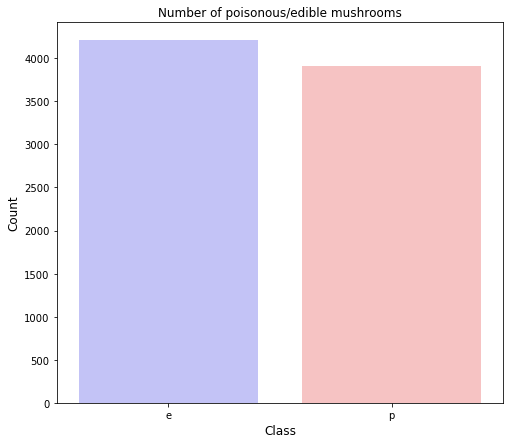

In [10]:
#Now let’s check how many the edible and poisonous mushrooms we have in our dataset:
count = df['class'].value_counts()
plt.figure(figsize=(8,7))
sns.barplot(count.index, count.values, alpha=0.8, palette="bwr")
plt.ylabel('Count', fontsize=12)
plt.xlabel('Class', fontsize=12)
plt.title('Number of poisonous/edible mushrooms')
#plt.savefig("mushrooms1.png", format='png', dpi=500)
plt.show()

Visually, we see that the dataset is balanced! Great!

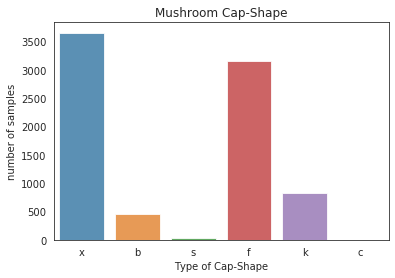

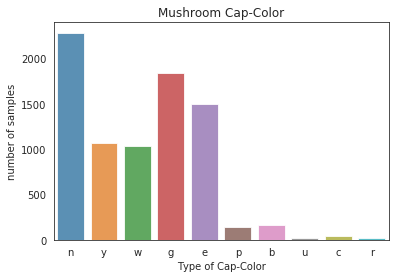

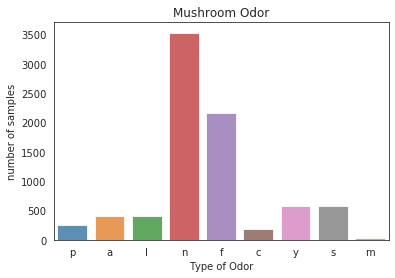

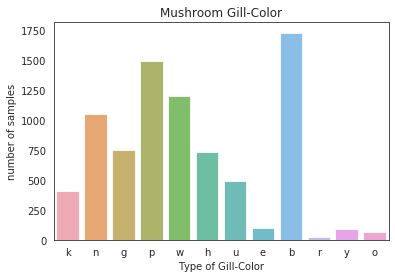

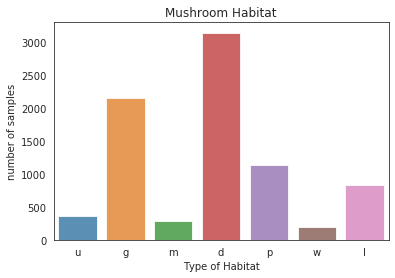

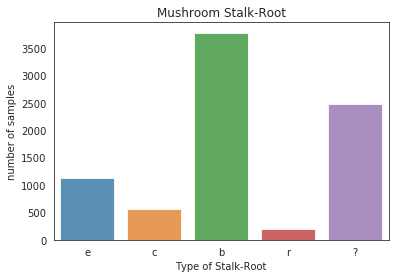

In [11]:
#now let's check the type of mushroom by different kind of each feature: cap-shape, cap-color, odor, gill-color, habitat, stalk-root
features=df
                       
def featureplot(col):
    sns.set_style('white')
    plt.figure()
    sns.countplot(features[col],alpha =.80)
    plt.ylabel('number of samples')
    plt.title('Mushroom' + ' ' + col.title())
    plt.xlabel('Type of' + ' ' + col.title())
    

    plt.show()
    

featureplot('cap-shape')
featureplot('cap-color')
featureplot('odor')
featureplot('gill-color')
featureplot('habitat')
featureplot('stalk-root')

Once we checked and understood the Data we have avalaible, we can start with processing and manipulating the dataset in order to get the best results, and hence, the best insights for our business users or other stakeholders.

Data Manipulation

The data we have is categorical so we’ll use LabelEncoder which will convert each categorical value to a number.  But first, we need to convert first our object type to categorical in order to execute LabelEncoder.So, generally, if you check our above df.info(), a non-numerical value is of type object. So we need to change the type 'object' to 'category' before using Label Encoder.

In [12]:
df = df.astype('category')
df.dtypes

class                       category
cap-shape                   category
cap-surface                 category
cap-color                   category
bruises                     category
odor                        category
gill-attachment             category
gill-spacing                category
gill-size                   category
gill-color                  category
stalk-shape                 category
stalk-root                  category
stalk-surface-above-ring    category
stalk-surface-below-ring    category
stalk-color-above-ring      category
stalk-color-below-ring      category
veil-type                   category
veil-color                  category
ring-number                 category
ring-type                   category
spore-print-color           category
population                  category
habitat                     category
dtype: object

Now, our columns are of type 'category'. We can now use LabelEncoder to convert categorical values to numerical.

In [13]:
labelencoder=LabelEncoder()
for column in df.columns:
    df[column] = labelencoder.fit_transform(df[column])

In [14]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


Now we have values instead of categorical in all our column.


In [15]:
for col in df:
    print(df[col].unique())

[1 0]
[5 0 4 2 3 1]
[2 3 0 1]
[4 9 8 3 2 5 0 7 1 6]
[1 0]
[6 0 3 5 2 1 8 7 4]
[1 0]
[0 1]
[1 0]
[ 4  5  2  7 10  3  9  1  0  8 11  6]
[0 1]
[3 2 1 4 0]
[2 0 1 3]
[2 0 3 1]
[7 3 6 4 0 2 5 1 8]
[7 6 3 0 4 2 8 5 1]
[0]
[2 0 1 3]
[1 2 0]
[4 0 2 1 3]
[2 3 6 1 7 5 4 8 0]
[3 2 0 4 5 1]
[5 1 3 0 4 6 2]


As you can see above, the column “veil-type” only has unique value of 0, so we will remove it as it's not helping to our analisis.

In [16]:
df = df.drop(["veil-type"],axis=1)

Now we will have a quick look at the distribution of characteristics  of the data through violin plot:

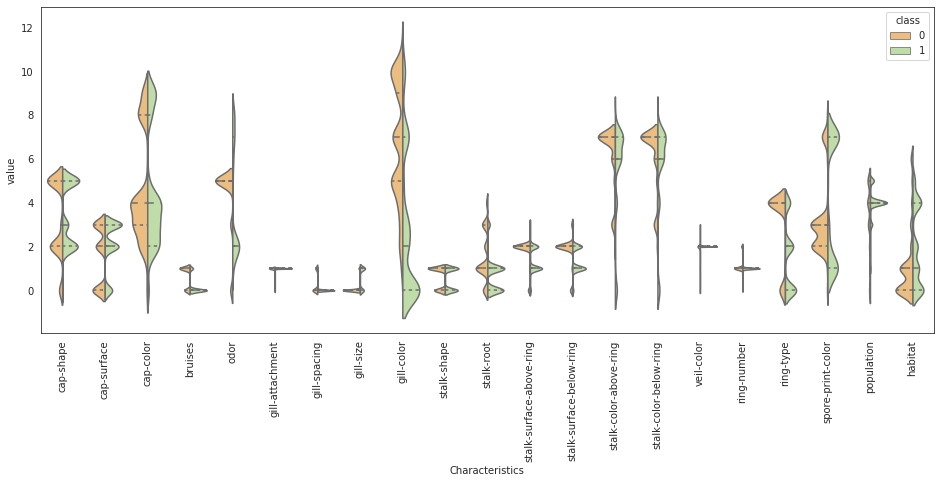

In [17]:
df_div = pd.melt(df, 'class', var_name='Characteristics')
fig, ax = plt.subplots(figsize=(16,6))
p = sns.violinplot(ax = ax, x='Characteristics', y='value', hue='class', split = True, data=df_div, inner = 'quartile', palette="Spectral")
df_no_class = df.drop(['class'],axis = 1)
p.set_xticklabels(rotation = 90, labels = list(df_no_class.columns));


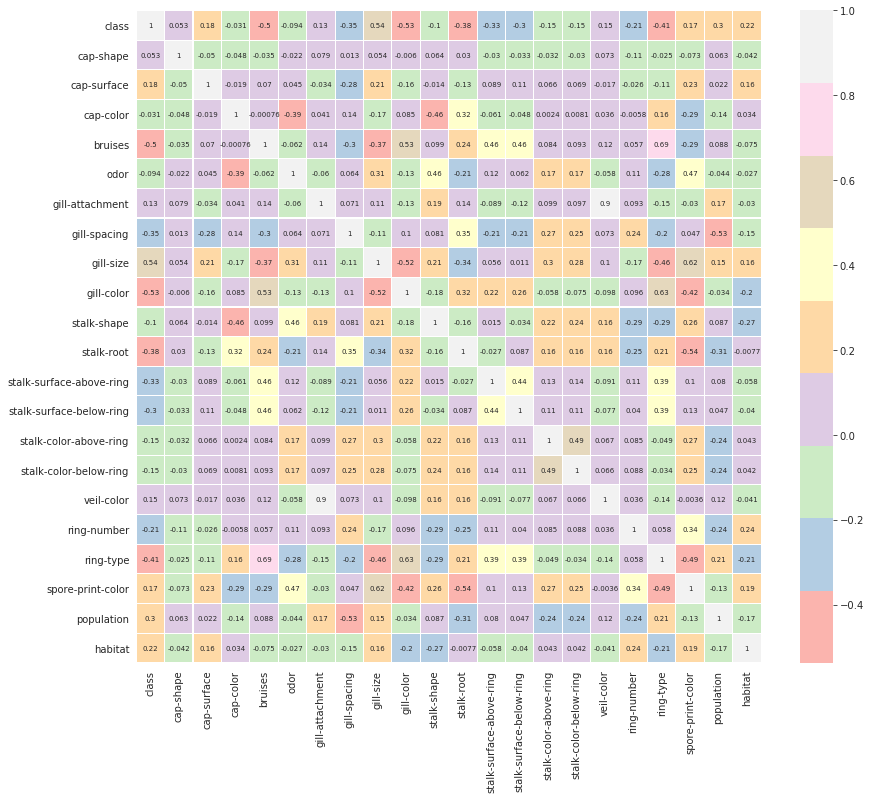

In [18]:
#Let’s look at the correlation between the variables
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(),linewidths=.1,cmap="Pastel1", annot=True, annot_kws={"size": 7})
sns.color_palette("rocket")
plt.yticks(rotation=0);
#plt.savefig("corr.png", format='png', dpi=400, bbox_inches='tight')



We have gill size and gill colorare the characteristics that impact the most to our target column.

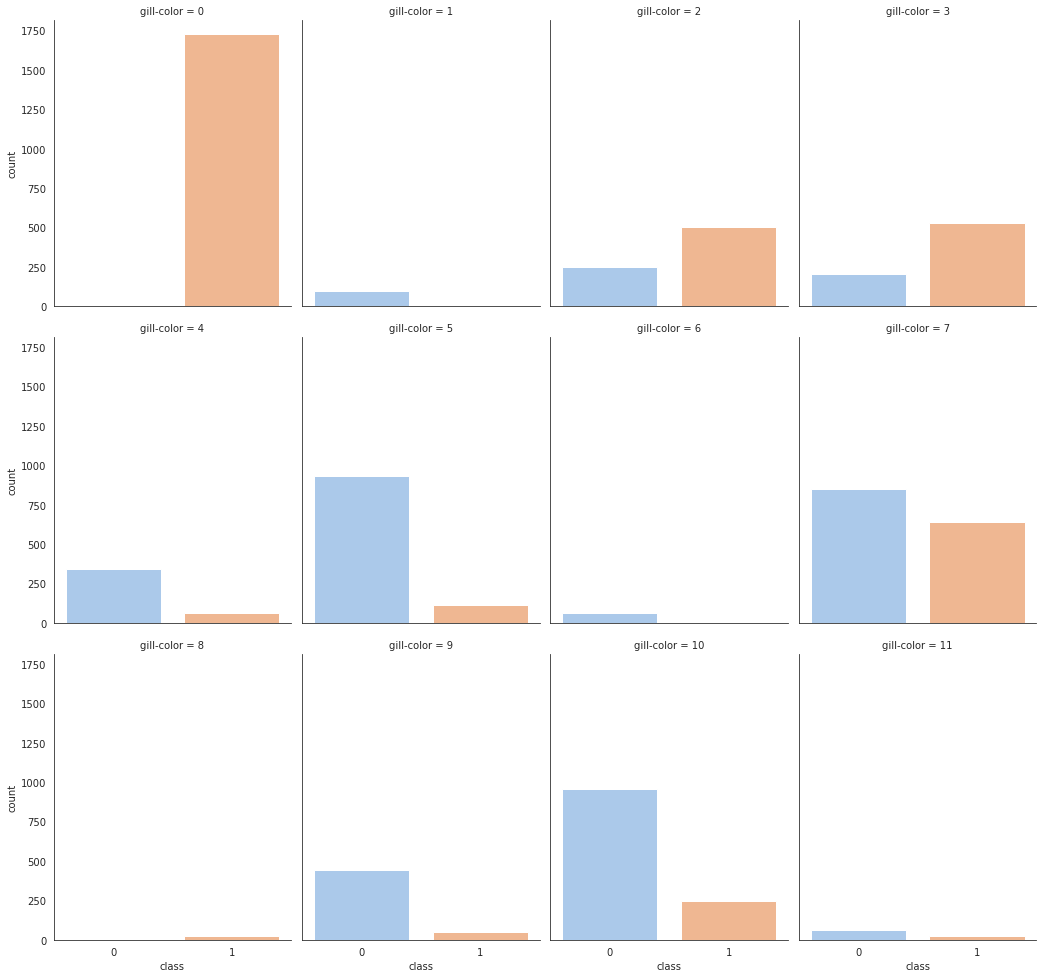

In [19]:
#Lets check the count of mushrooms by different type of the feature “gill-color”
new_var = df[['class', 'gill-color']]
new_var = new_var[new_var['gill-color']<=12]
sns.factorplot('class', col='gill-color', data=new_var, kind='count', size=4.5, aspect=.8, col_wrap=4, palette="pastel");
#plt.savefig("gillcolor1.png", format='png', dpi=500, bbox_inches='tight')

We see we have different kind of plot for different gill-color, which means the variable gill-color is important to include in our analisis and include it in our machine learning.

Let's start preparing the data

Preparing the Data

In [20]:
#Setting X and y-axis and splitting the data into train and test respectively.
#Since we want to predict the class of the mushroom, we will drop the ‘class’ column.

X = df.drop(['class'], axis=1)
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)

Classification Methods

As we mentioned, we will use and try to study and analize our mushroom data through the following algorithms: Decision Tree Classifier, Logistic Regression Classifier, k-Nearest Neighbor Classifier, Support Vector Machine Classifier, Naive Bayes Classifier, Random Forest Classifier

1. Decision Tree Classification

In [21]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

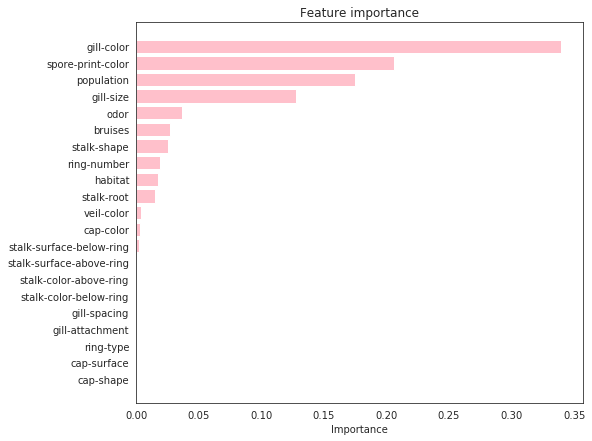

In [22]:
#Eventhough, the following feature list should give us that the first main feature is the gill color but let's check to be assure:
features_list = X.columns.values
feature_importance = dt.feature_importances_
sorted_idx = np.argsort(feature_importance)
plt.figure(figsize=(8,7))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center', color ="pink")
plt.yticks(range(len(sorted_idx)), features_list[sorted_idx])
plt.xlabel('Importance')
plt.title('Feature importance')
plt.draw()
#plt.savefig("featureimp.png", format='png', dpi=500, bbox_inches='tight')
plt.show()

Predicting the target and checking the accuracy:

In [23]:
y_pred_dt = dt.predict(X_test)
print("Decision Tree Classifier report: \n\n", classification_report(y_test, y_pred_dt))
print("Test Accuracy: {}%".format(round(dt.score(X_test, y_test)*100, 2)))

Decision Tree Classifier report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       433
           1       1.00      1.00      1.00       380

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813

Test Accuracy: 100.0%


Confusion Matrix for Decision Tree Classifier

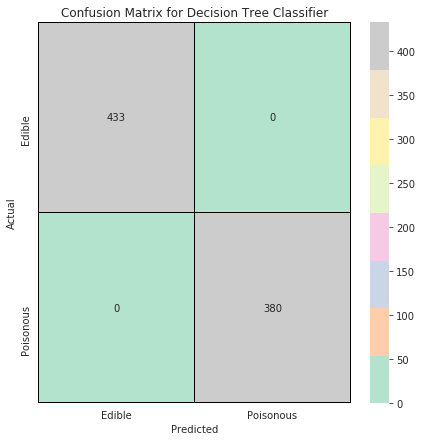

In [24]:
cm = confusion_matrix(y_test, y_pred_dt)
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Pastel2", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Confusion Matrix for Decision Tree Classifier')
#plt.savefig("dtcm.png", format='png', dpi=500, bbox_inches='tight')
plt.show()

2. Logistic Regression Classification

In [25]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver="lbfgs", max_iter=500)
lr.fit(X_train, y_train)
print("Test Accuracy: {}%".format(round(lr.score(X_test, y_test)*100,2)))

Test Accuracy: 94.96%


Classification report of Logistic Regression Classifier

In [26]:
y_pred_lr = lr.predict(X_test)
print("Logistic Regression Classifier report: \n\n", classification_report(y_test, y_pred_lr))

Logistic Regression Classifier report: 

               precision    recall  f1-score   support

           0       0.96      0.94      0.95       433
           1       0.94      0.96      0.95       380

    accuracy                           0.95       813
   macro avg       0.95      0.95      0.95       813
weighted avg       0.95      0.95      0.95       813



Confusion Matrix for Logistic Regression Classifier

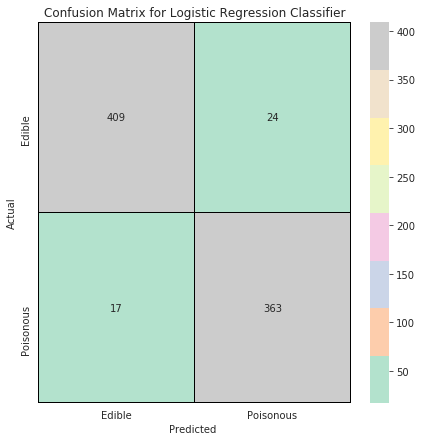

In [27]:
cm = confusion_matrix(y_test, y_pred_lr)
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Pastel2", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("Predicted ")
plt.ylabel("Actual")
plt.title('Confusion Matrix for Logistic Regression Classifier')
#plt.savefig("lrcm.png", format='png', dpi=500, bbox_inches='tight')
plt.show()

3. KNN Classification

In [28]:
from sklearn.neighbors import KNeighborsClassifier
best_Kvalue = 0
best_score = 0
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    if knn.score(X_test, y_test) > best_score:
        best_score = knn.score(X_train, y_train)
        best_Kvalue = i
        
print("Best KNN factor: {}".format(best_Kvalue))
print("Accuracy: {}%".format(round(best_score*100,2)))

Best KNN factor: 1
Accuracy: 100.0%


Classification report of KNN Classifier

In [29]:
y_pred_knn = knn.predict(X_test)
print("KNN Classifier report: \n\n", classification_report(y_test, y_pred_knn))

KNN Classifier report: 

               precision    recall  f1-score   support

           0       1.00      0.99      1.00       433
           1       0.99      1.00      1.00       380

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813



Confusion Matrix for KNN Classifier

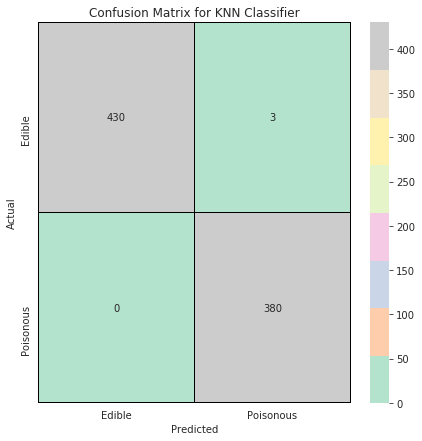

In [30]:
cm = confusion_matrix(y_test, y_pred_knn)
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Pastel2", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Confusion Matrix for KNN Classifier')
#plt.savefig("knncm.png", format='png', dpi=500, bbox_inches='tight')
plt.show()

SVM Classification

In [31]:
from sklearn.svm import SVC
svm = SVC(random_state=42, gamma="auto")
svm.fit(X_train, y_train)
print("Test Accuracy: {}%".format(round(svm.score(X_test, y_test)*100, 2)))

Test Accuracy: 100.0%


Classification report of SVM Classifier

In [32]:
y_pred_svm = svm.predict(X_test)
print("SVM Classifier report: \n\n", classification_report(y_test, y_pred_svm))

SVM Classifier report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       433
           1       1.00      1.00      1.00       380

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813



Confusion Matrix for SVM Classifier

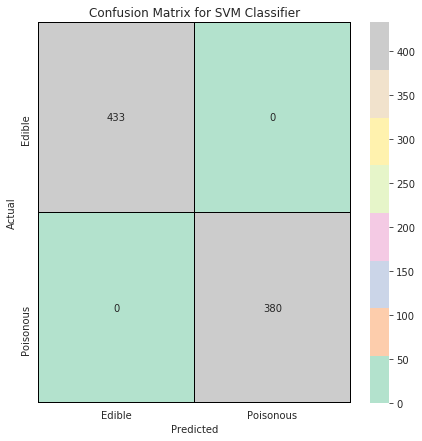

In [33]:
cm = confusion_matrix(y_test, y_pred_svm)
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Pastel2", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Confusion Matrix for SVM Classifier')
#plt.savefig("svmcm.png", format='png', dpi=500, bbox_inches='tight')
plt.show()

5. Naive Bayes Classification

In [34]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
print("Test Accuracy: {}%".format(round(nb.score(X_test, y_test)*100, 2)))

Test Accuracy: 92.62%


Classification report of Naive Bayes Classifier

In [35]:
y_pred_nb = nb.predict(X_test)
print("Naive Bayes Classifier report: \n\n", classification_report(y_test, y_pred_nb))

Naive Bayes Classifier report: 

               precision    recall  f1-score   support

           0       0.94      0.92      0.93       433
           1       0.91      0.94      0.92       380

    accuracy                           0.93       813
   macro avg       0.93      0.93      0.93       813
weighted avg       0.93      0.93      0.93       813



Confusion Matrix for Naive Bayes Classifier

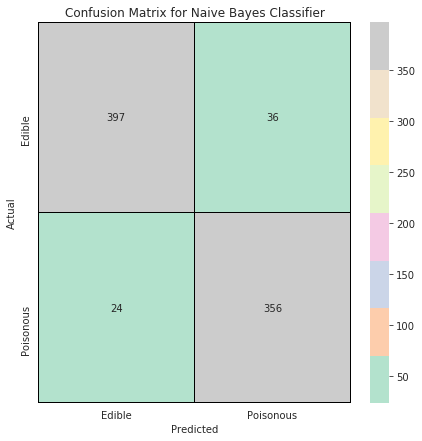

In [36]:
cm = confusion_matrix(y_test, y_pred_nb)
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Pastel2", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Confusion Matrix for Naive Bayes Classifier')
#plt.savefig("nbcm.png", format='png', dpi=500, bbox_inches='tight')
plt.show()

6. Random Forest Classification

In [37]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
print(" Test Accuracy: {}%".format(round(rf.score(X_test, y_test)*100, 2)))

 Test Accuracy: 100.0%


Classification report of Random Forest Classifier

In [38]:
y_pred_rf = rf.predict(X_test)
print("Random Forest Classifier report: \n\n", classification_report(y_test, y_pred_rf))

Random Forest Classifier report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       433
           1       1.00      1.00      1.00       380

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813



Confusion Matrix for Random Forest Classifier


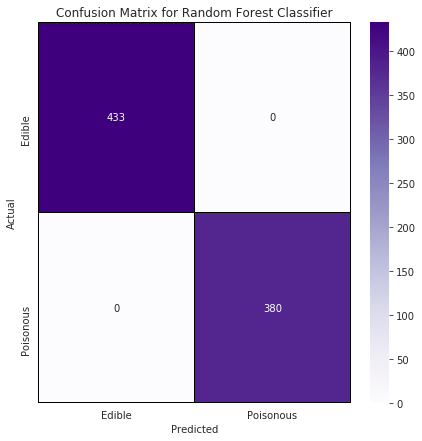

In [39]:
cm = confusion_matrix(y_test, y_pred_rf)
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Confusion Matrix for Random Forest Classifier');
#plt.savefig("rfcm.png", format='png', dpi=500, bbox_inches='tight')
plt.show()

Predictions
Predicting some of the X_test results and matching it with true i.e. y_test values using Decision Tree Classifier.

In [40]:
preds = dt.predict(X_test)
print(preds[:36])
print(y_test[:36].values)
# 0 - Edible
# 1 - Poisonous

[0 1 1 0 1 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 0 1]
[0 1 1 0 1 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 0 1]


As we can see, the predicted and the Actual values match 100%.

Conclusion
From the confusion matrix, we saw that our train and test data is balanced.
The majority of the classification methods hit 100% accuracy with this dataset.
Which means we are confident about over machine learning methods thanks to the testing results and accuracy performance.

In [41]:
#A SECOND TRY_LET'S SEE IF GET BETTER RESULTS (just to check and be sure)


In [42]:
df = pd.read_csv("mushrooms.csv") #loading data again for our second try

In [43]:
#spliting our X and Y values for training and testing
X = df.drop(['class'], axis=1)  
y = df["class"]



In [44]:
labelencoder_x=LabelEncoder() #encoding our features
for column in X.columns:
    X[column] = labelencoder_x.fit_transform(X[column])
    
labelencoder_y=LabelEncoder()
y = labelencoder_y.fit_transform(y)

In [45]:

X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1


In [46]:
y

array([1, 0, 0, ..., 0, 1, 0])

In [47]:
X=pd.get_dummies(X,columns=X.columns,drop_first=True) #using dummies in order to convert categorical to numerical values.
X.head()

,cap-shape_1,cap-shape_2,cap-shape_3,cap-shape_4,cap-shape_5,cap-surface_1,cap-surface_2,cap-surface_3,cap-color_1,cap-color_2,...,population_2,population_3,population_4,population_5,habitat_1,habitat_2,habitat_3,habitat_4,habitat_5,habitat_6
0,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


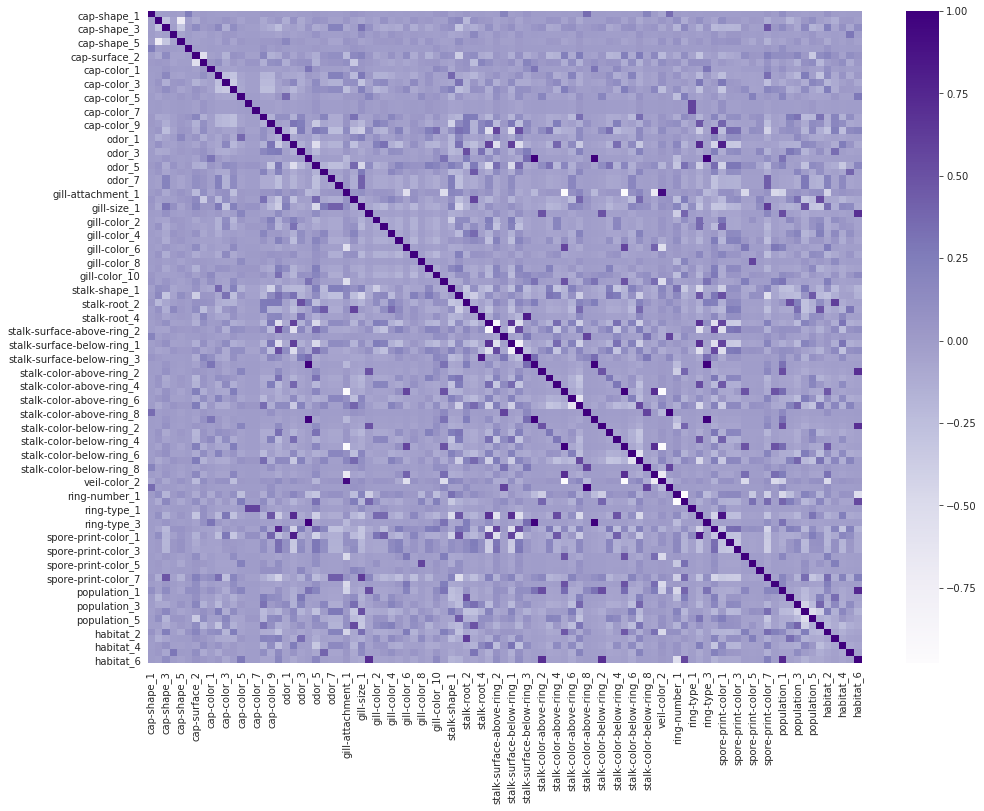

In [48]:
#printing heatmap for correlation purposes
plt.figure(figsize=(16,12))
sns.heatmap(X.corr(),linewidths=.0,cmap="Purples")
plt.yticks(rotation=0);
#plt.savefig("corr2.jpeg", format='jpeg', dpi=300, bbox_inches='tight')


In [49]:
#training the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [50]:
#standarizing the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X2 = sc.fit_transform(X)
X_test = sc.transform(X_test)

In [51]:
#training the data after have standarized for better results.
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.3, random_state=42)


In [52]:
#analize and check through PCA if we get any insights/clusters of data.
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_train_pca=pca.fit_transform(X_train) 
X_test_pca=pca.transform(X_test)
print("Original shape:",X_train.shape)
print('Shape of PCA data:',X_train_pca.shape)

Original shape: (5686, 95)
Shape of PCA data: (5686, 2)


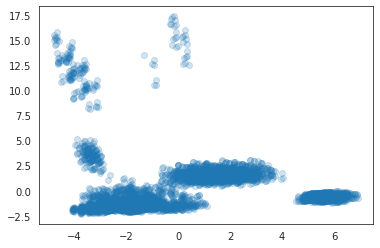

In [53]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], alpha=0.2)

Logistic Regression¶


In [54]:
#training a logistic Regression model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_pca,y_train)

LogisticRegression()

In [55]:
#Training and obtainning the results of accuracy, precision, recall, f1-score of Logistic regression and checking average accuracy through cross validation results.
print("Training results:\n")
print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_train,lr.predict(X_train_pca))))
print('Classification Report:\n{}\n'.format(classification_report(y_train,lr.predict(X_train_pca))))
print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_train,lr.predict(X_train_pca))))
res = cross_val_score(lr, X_train_pca, y_train, cv=10, n_jobs=-1, scoring='accuracy')
print('Average Accuracy:\t{0:.4f}\n'.format((res.mean())))
print('Standard Deviation:\t{0:.4f}'.format(res.std()))

Training results:

Accuracy Score: 0.9061

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.97      0.91      2951
           1       0.96      0.84      0.90      2735

    accuracy                           0.91      5686
   macro avg       0.91      0.90      0.91      5686
weighted avg       0.91      0.91      0.91      5686


Confusion Matrix:
[[2849  102]
 [ 432 2303]]

Average Accuracy:	0.9066

Standard Deviation:	0.0103


In [56]:
#Testing and obtainning the results of accuracy, precision, recall, f1-score of Logistic regression.

print("Testing results:\n")
print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_test,lr.predict(X_test_pca))))
print('Classification Report:\n{}\n'.format(classification_report(y_test,lr.predict(X_test_pca))))
print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_test,lr.predict(X_test_pca))))

Testing results:

Accuracy Score: 0.9028

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1257
           1       0.96      0.83      0.89      1181

    accuracy                           0.90      2438
   macro avg       0.91      0.90      0.90      2438
weighted avg       0.91      0.90      0.90      2438


Confusion Matrix:
[[1218   39]
 [ 198  983]]



'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


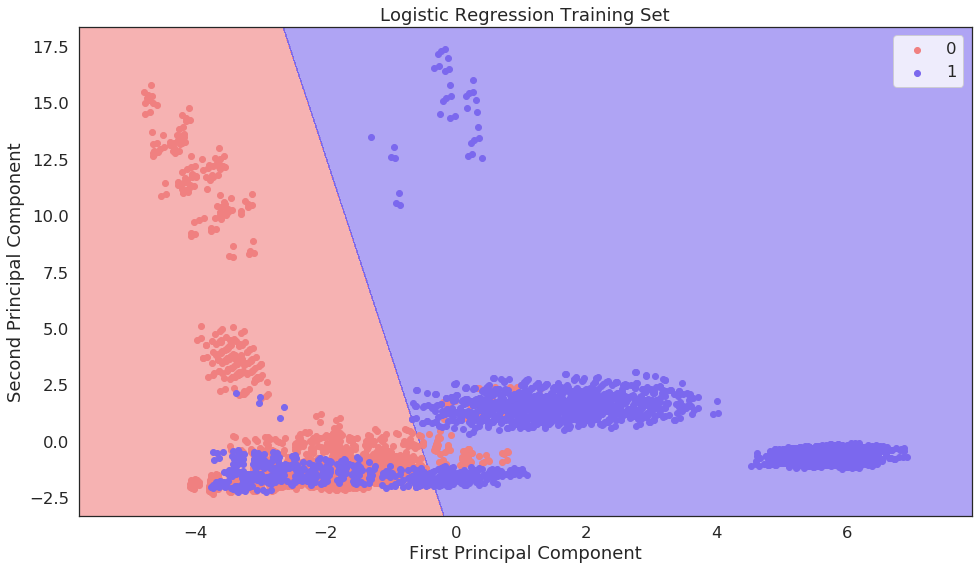

In [57]:
#plotting Logistic Regression Training Set
sns.set_context(context='notebook',font_scale=1.5)
plt.figure(figsize=(16,9))
from matplotlib.colors import ListedColormap
X_set, y_set = X_train_pca, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, lr.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.6, cmap = ListedColormap(('lightcoral', 'mediumslateblue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('lightcoral', 'mediumslateblue'))(i), label = j)
plt.title("Logistic Regression Training Set")
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.savefig("lr_pci_tr.jpeg", format='jpeg', dpi=300, bbox_inches='tight')
plt.legend()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


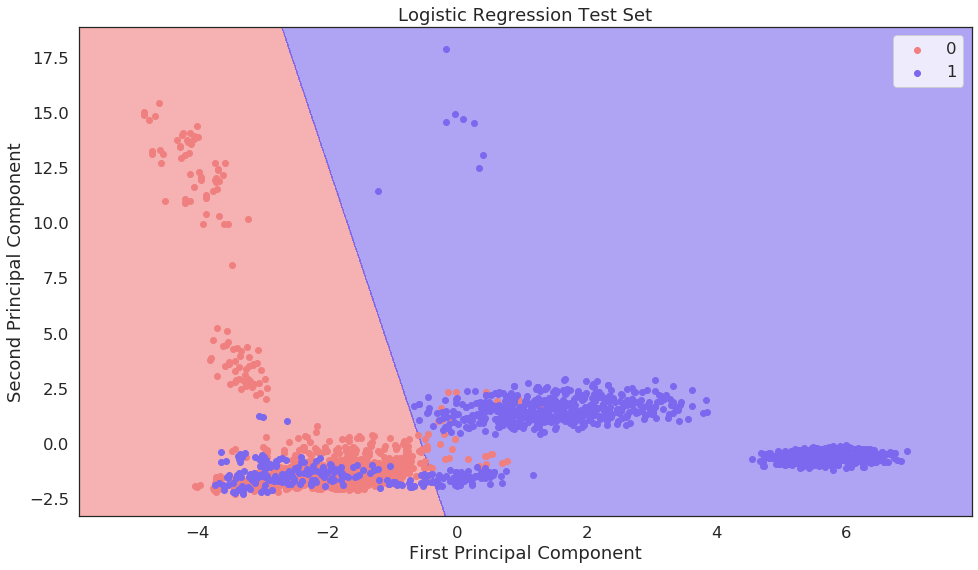

In [58]:
#plotting Logistic Regression Test Set
sns.set_context(context='notebook',font_scale=1.5)
plt.figure(figsize=(16,9))
from matplotlib.colors import ListedColormap
X_set, y_set = X_test_pca, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, lr.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.6, cmap = ListedColormap(('lightcoral', 'mediumslateblue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('lightcoral', 'mediumslateblue'))(i), label = j)
plt.title("Logistic Regression Test Set")
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.savefig("lr_pci_ts.jpeg", format='jpeg', dpi=300, bbox_inches='tight')
plt.legend()

Decision Tree

In [59]:
#Now let's try with Decision Tree Algorithm:
from sklearn.tree import DecisionTreeClassifier as DT

dt = DT(criterion='entropy',random_state=42)
dt.fit(X_train_pca,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [60]:
#training results
print("Training results:\n")
print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_train,dt.predict(X_train_pca))))
print('Classification Report:\n{}\n'.format(classification_report(y_train,dt.predict(X_train_pca))))
print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_train,dt.predict(X_train_pca))))
res = cross_val_score(dt, X_train_pca, y_train, cv=10, n_jobs=-1, scoring='accuracy')
print('Average Accuracy:\t{0:.4f}\n'.format((res.mean())))
print('Standard Deviation:\t{0:.4f}'.format(res.std()))

Training results:

Accuracy Score: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2951
           1       1.00      1.00      1.00      2735

    accuracy                           1.00      5686
   macro avg       1.00      1.00      1.00      5686
weighted avg       1.00      1.00      1.00      5686


Confusion Matrix:
[[2951    0]
 [   0 2735]]

Average Accuracy:	0.8899

Standard Deviation:	0.0129


In [61]:
#testing results:
print("Testing results:\n")
print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_test,dt.predict(X_test_pca))))
print('Classification Report:\n{}\n'.format(classification_report(y_test,dt.predict(X_test_pca))))
print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_test,dt.predict(X_test_pca))))

Testing results:

Accuracy Score: 0.8925

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      1257
           1       0.89      0.89      0.89      1181

    accuracy                           0.89      2438
   macro avg       0.89      0.89      0.89      2438
weighted avg       0.89      0.89      0.89      2438


Confusion Matrix:
[[1126  131]
 [ 131 1050]]



'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


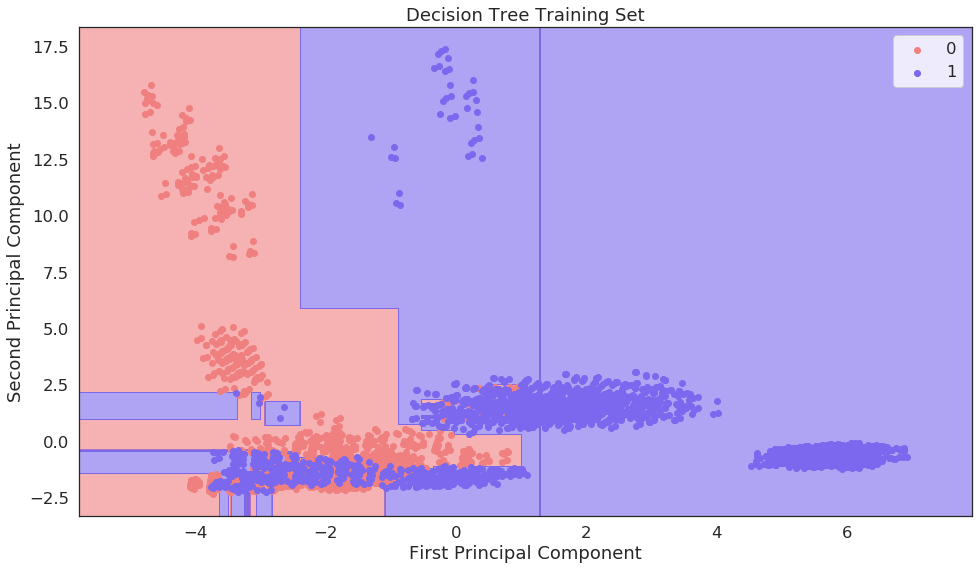

In [62]:
#Decision Tree Training Set
sns.set_context(context='notebook',font_scale=1.5)
plt.figure(figsize=(16,9))
from matplotlib.colors import ListedColormap
X_set, y_set = X_train_pca, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, dt.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.6, cmap = ListedColormap(('lightcoral', 'mediumslateblue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('lightcoral', 'mediumslateblue'))(i), label = j)
plt.title("Decision Tree Training Set")
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.savefig("dt_pci_tr.jpeg", format='jpeg', dpi=300, bbox_inches='tight')
plt.legend()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


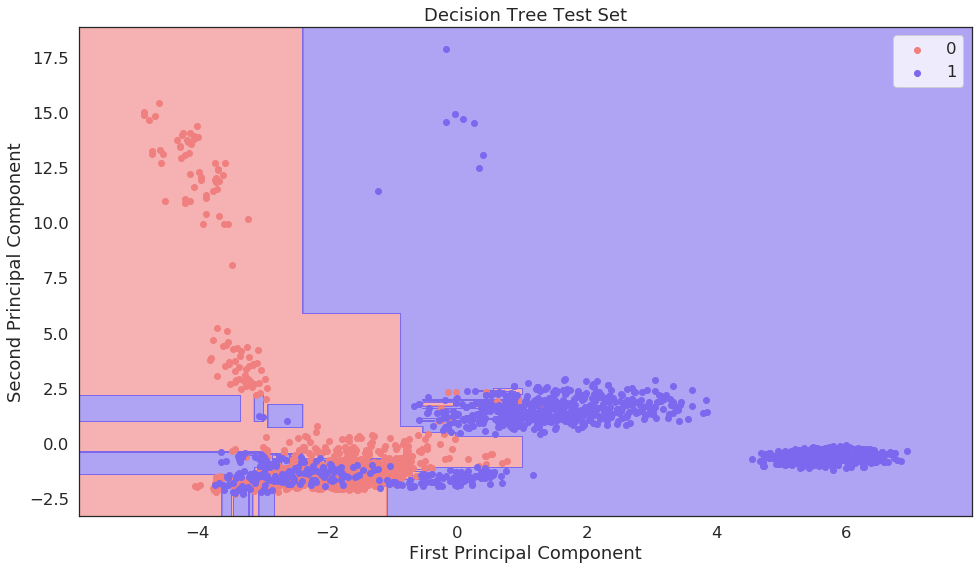

In [63]:
#Testing Set of DT
sns.set_context(context='notebook',font_scale=1.5)
plt.figure(figsize=(16,9))
from matplotlib.colors import ListedColormap
X_set, y_set = X_test_pca, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, dt.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.6, cmap = ListedColormap(('lightcoral', 'mediumslateblue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('lightcoral', 'mediumslateblue'))(i), label = j)
plt.title("Decision Tree Test Set")
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.savefig("dt_pci_ts.jpeg", format='jpeg', dpi=300, bbox_inches='tight')
plt.legend()

Support Vector Machines

In [64]:
from sklearn.svm import SVC

svm = SVC(random_state=42, gamma="auto", probability=True)
svm.fit(X_train_pca, y_train)


SVC(gamma='auto', probability=True, random_state=42)

In [65]:
print("Training results:\n")
print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_train,svm.predict(X_train_pca))))
print('Classification Report:\n{}\n'.format(classification_report(y_train,svm.predict(X_train_pca))))
print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_train,svm.predict(X_train_pca))))
res = cross_val_score(svm, X_train_pca, y_train, cv=10, n_jobs=-1, scoring='accuracy')
print('Average Accuracy:\t{0:.4f}\n'.format((res.mean())))
print('Standard Deviation:\t{0:.4f}'.format(res.std()))

Training results:

Accuracy Score: 0.9240

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.98      0.93      2951
           1       0.98      0.86      0.92      2735

    accuracy                           0.92      5686
   macro avg       0.93      0.92      0.92      5686
weighted avg       0.93      0.92      0.92      5686


Confusion Matrix:
[[2893   58]
 [ 374 2361]]

Average Accuracy:	0.9235

Standard Deviation:	0.0104


In [66]:
print("Testing results:\n")
print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_test,svm.predict(X_test_pca))))
print('Classification Report:\n{}\n'.format(classification_report(y_test,svm.predict(X_test_pca))))
print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_test,svm.predict(X_test_pca))))

Testing results:

Accuracy Score: 0.9192

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.98      0.93      1257
           1       0.98      0.85      0.91      1181

    accuracy                           0.92      2438
   macro avg       0.93      0.92      0.92      2438
weighted avg       0.93      0.92      0.92      2438


Confusion Matrix:
[[1234   23]
 [ 174 1007]]



'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


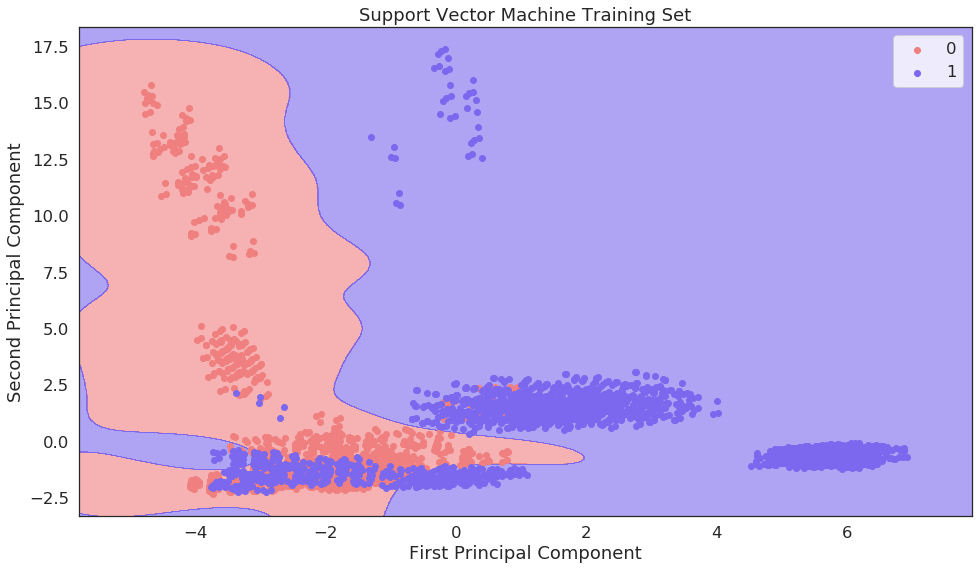

In [67]:
#SVM Training Set
sns.set_context(context='notebook',font_scale=1.5)
plt.figure(figsize=(16,9))
from matplotlib.colors import ListedColormap
X_set, y_set = X_train_pca, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, svm.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.6, cmap = ListedColormap(('lightcoral', 'mediumslateblue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('lightcoral', 'mediumslateblue'))(i), label = j)
plt.title("Support Vector Machine Training Set")
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.savefig("svm_pci_tr.jpeg", format='jpeg', dpi=300, bbox_inches='tight')
plt.legend()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


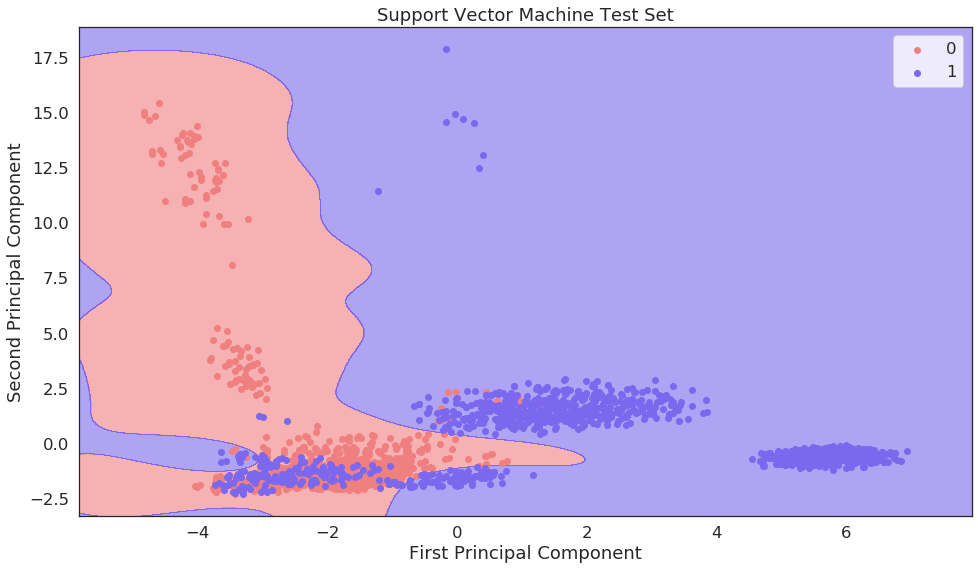

In [68]:
#SVM Test Set
sns.set_context(context='notebook',font_scale=1.5)
plt.figure(figsize=(16,9))
from matplotlib.colors import ListedColormap
X_set, y_set = X_test_pca, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, svm.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.6, cmap = ListedColormap(('lightcoral', 'mediumslateblue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('lightcoral', 'mediumslateblue'))(i), label = j)
plt.title("Support Vector Machine Test Set")
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.savefig("svm_pci_ts.jpeg", format='jpeg', dpi=300, bbox_inches='tight')
plt.legend()

K-Nearest Neighbors

In [69]:
from sklearn.neighbors import KNeighborsClassifier as KNN
knn = KNN()
knn.fit(X_train_pca,y_train)

KNeighborsClassifier()

In [70]:
print("Training results:\n")
print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_train,knn.predict(X_train_pca))))
print('Classification Report:\n{}\n'.format(classification_report(y_train,knn.predict(X_train_pca))))
print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_train,knn.predict(X_train_pca))))
res = cross_val_score(knn, X_train_pca, y_train, cv=10, n_jobs=-1, scoring='accuracy')
print('Average Accuracy:\t{0:.4f}\n'.format((res.mean())))
print('Standard Deviation:\t{0:.4f}'.format(res.std()))

Training results:

Accuracy Score: 0.9432

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      2951
           1       0.97      0.91      0.94      2735

    accuracy                           0.94      5686
   macro avg       0.95      0.94      0.94      5686
weighted avg       0.94      0.94      0.94      5686


Confusion Matrix:
[[2872   79]
 [ 244 2491]]

Average Accuracy:	0.9284

Standard Deviation:	0.0106


In [71]:
print("Testing results :\n")
print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_test,knn.predict(X_test_pca))))
print('Classification Report:\n{}\n'.format(classification_report(y_test,knn.predict(X_test_pca))))
print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_test,knn.predict(X_test_pca))))

Testing results :

Accuracy Score: 0.9204

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.96      0.93      1257
           1       0.95      0.88      0.91      1181

    accuracy                           0.92      2438
   macro avg       0.92      0.92      0.92      2438
weighted avg       0.92      0.92      0.92      2438


Confusion Matrix:
[[1206   51]
 [ 143 1038]]



'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


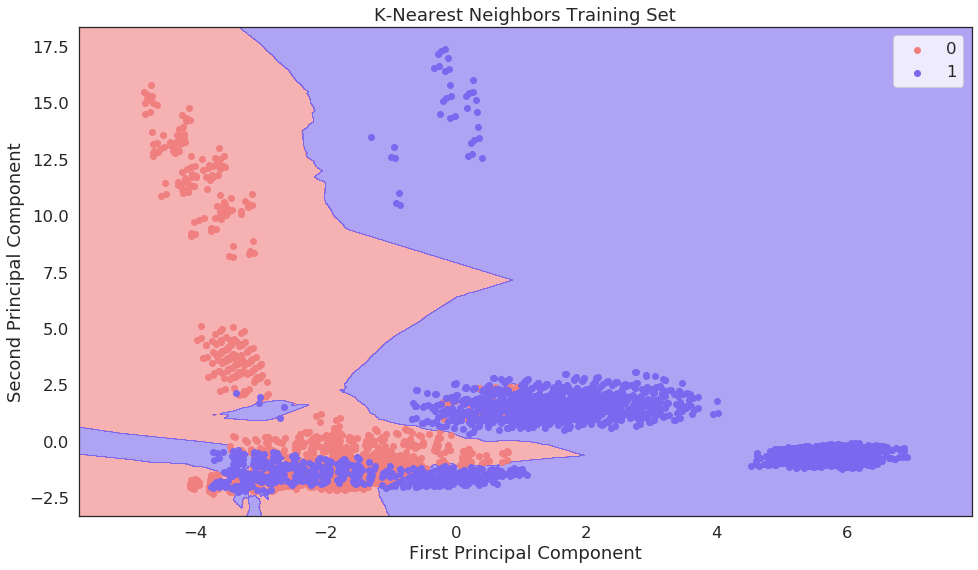

In [72]:
#KNN Training Set
sns.set_context(context='notebook',font_scale=1.5)
plt.figure(figsize=(16,9))
from matplotlib.colors import ListedColormap
X_set, y_set = X_train_pca, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, knn.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.6, cmap = ListedColormap(('lightcoral', 'mediumslateblue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('lightcoral', 'mediumslateblue'))(i), label = j)
plt.title("K-Nearest Neighbors Training Set")
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.savefig("knn_pci_tr.jpeg", format='jpeg', dpi=300, bbox_inches='tight')
plt.legend()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


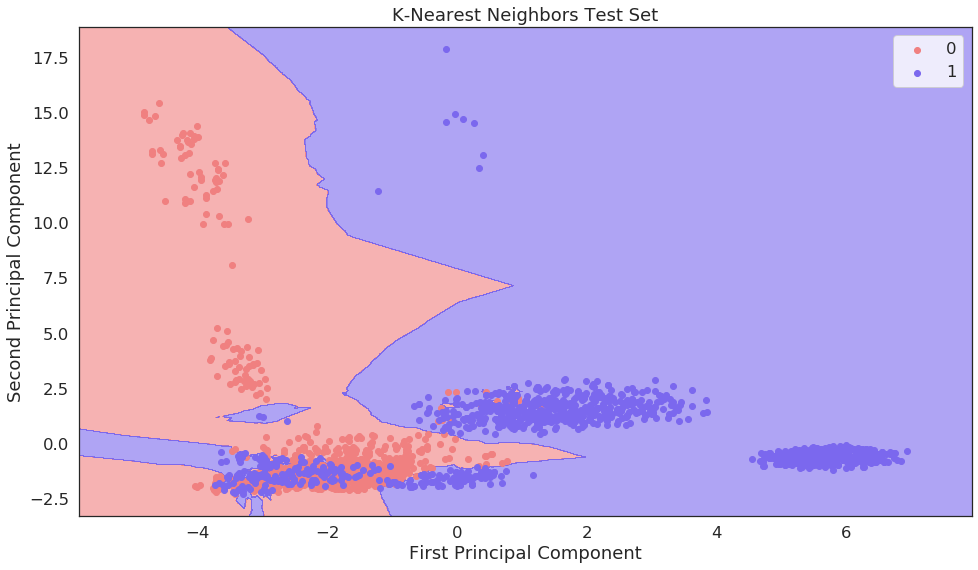

In [73]:
#KNN Testing Set
sns.set_context(context='notebook',font_scale=1.5)
plt.figure(figsize=(16,9))
from matplotlib.colors import ListedColormap
X_set, y_set = X_test_pca, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, knn.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.6, cmap = ListedColormap(('lightcoral', 'mediumslateblue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('lightcoral', 'mediumslateblue'))(i), label = j)
plt.title("K-Nearest Neighbors Test Set")
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.savefig("knn_pci_ts.jpeg", format='jpeg', dpi=300, bbox_inches='tight')
plt.legend()

Naive Bayes

In [74]:
from sklearn.naive_bayes import GaussianNB as NB
nb = NB()
nb.fit(X_train_pca,y_train)

GaussianNB()

In [75]:
print("Training results:\n")
print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_train,nb.predict(X_train_pca))))
print('Classification Report:\n{}\n'.format(classification_report(y_train,nb.predict(X_train_pca))))
print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_train,nb.predict(X_train_pca))))
res = cross_val_score(nb, X_train_pca, y_train, cv=10, n_jobs=-1, scoring='accuracy')
print('Average Accuracy:\t{0:.4f}\n'.format((res.mean())))
print('Standard Deviation:\t{0:.4f}'.format(res.std()))

Training results:

Accuracy Score: 0.8983

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.97      0.91      2951
           1       0.96      0.83      0.89      2735

    accuracy                           0.90      5686
   macro avg       0.91      0.90      0.90      5686
weighted avg       0.90      0.90      0.90      5686


Confusion Matrix:
[[2850  101]
 [ 477 2258]]

Average Accuracy:	0.8987

Standard Deviation:	0.0113


In [76]:
print("Testing results:\n")
print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_test,nb.predict(X_test_pca))))
print('Classification Report:\n{}\n'.format(classification_report(y_test,nb.predict(X_test_pca))))
print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_test,nb.predict(X_test_pca))))

Testing results:

Accuracy Score: 0.8975

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.97      0.91      1257
           1       0.96      0.82      0.89      1181

    accuracy                           0.90      2438
   macro avg       0.91      0.90      0.90      2438
weighted avg       0.91      0.90      0.90      2438


Confusion Matrix:
[[1218   39]
 [ 211  970]]



'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


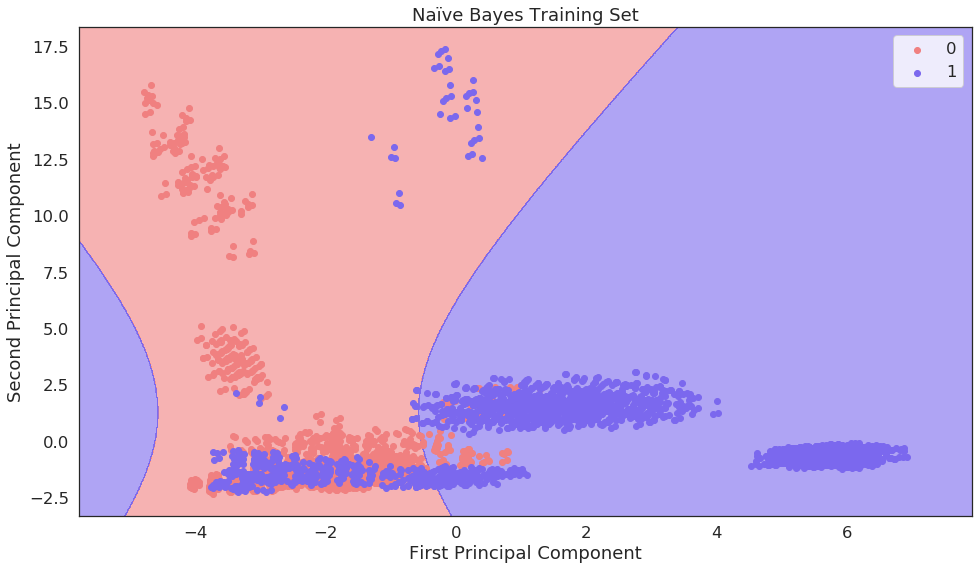

In [77]:
#plotting NB Train Set
sns.set_context(context='notebook',font_scale=1.5)
plt.figure(figsize=(16,9))
from matplotlib.colors import ListedColormap
X_set, y_set = X_train_pca, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, nb.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.6, cmap = ListedColormap(('lightcoral', 'mediumslateblue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('lightcoral', 'mediumslateblue'))(i), label = j)
plt.title("Naïve Bayes Training Set")
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.savefig("nb_pci_tr.jpeg", format='jpeg', dpi=300, bbox_inches='tight')
plt.legend()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


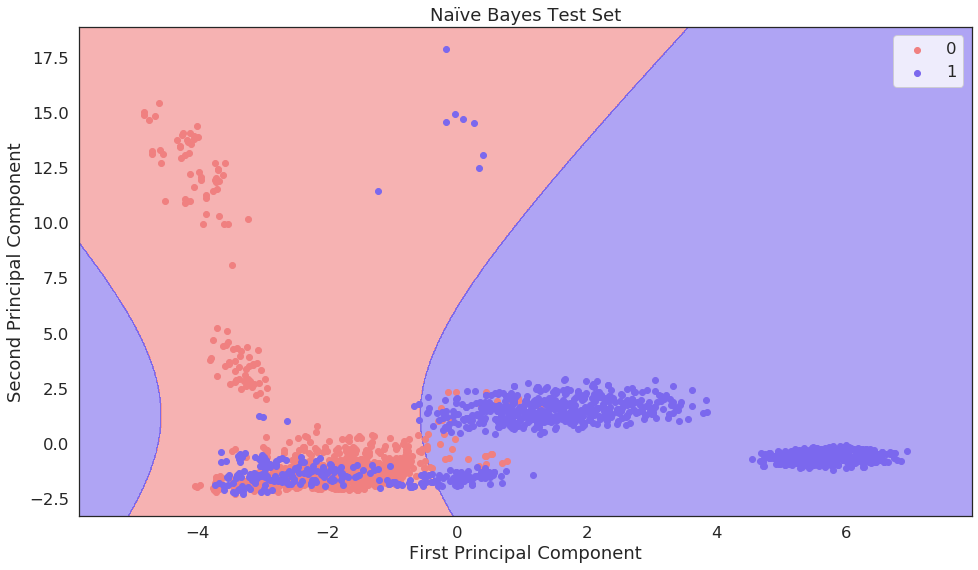

In [78]:
#plotting NB Test Set
sns.set_context(context='notebook',font_scale=1.5)
plt.figure(figsize=(16,9))
from matplotlib.colors import ListedColormap
X_set, y_set = X_test_pca, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, nb.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.6, cmap = ListedColormap(('lightcoral', 'mediumslateblue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('lightcoral', 'mediumslateblue'))(i), label = j)
plt.title("Naïve Bayes Test Set")
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.savefig("nb_pci_ts.jpeg", format='jpeg', dpi=300, bbox_inches='tight')
plt.legend()

Random Forest

In [79]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', random_state = 42)
rf.fit(X_train_pca, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=50, random_state=42)

In [80]:
print("Training Set:\n")
print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_train,rf.predict(X_train_pca))))
print('Classification Report:\n{}\n'.format(classification_report(y_train,rf.predict(X_train_pca))))
print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_train,rf.predict(X_train_pca))))
res = cross_val_score(rf, X_train_pca, y_train, cv=10, n_jobs=-1, scoring='accuracy')
print('Average Accuracy:\t{0:.4f}\n'.format((res.mean())))
print('Standard Deviation:\t{0:.4f}'.format(res.std()))

Training Set:

Accuracy Score: 0.9993

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2951
           1       1.00      1.00      1.00      2735

    accuracy                           1.00      5686
   macro avg       1.00      1.00      1.00      5686
weighted avg       1.00      1.00      1.00      5686


Confusion Matrix:
[[2951    0]
 [   4 2731]]

Average Accuracy:	0.9233

Standard Deviation:	0.0122


In [81]:
print("Testing Set:\n")
print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_test,rf.predict(X_test_pca))))
print('Classification Report:\n{}\n'.format(classification_report(y_test,rf.predict(X_test_pca))))
print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_test,rf.predict(X_test_pca))))

Testing Set:

Accuracy Score: 0.9221

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93      1257
           1       0.95      0.88      0.92      1181

    accuracy                           0.92      2438
   macro avg       0.92      0.92      0.92      2438
weighted avg       0.92      0.92      0.92      2438


Confusion Matrix:
[[1206   51]
 [ 139 1042]]



'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


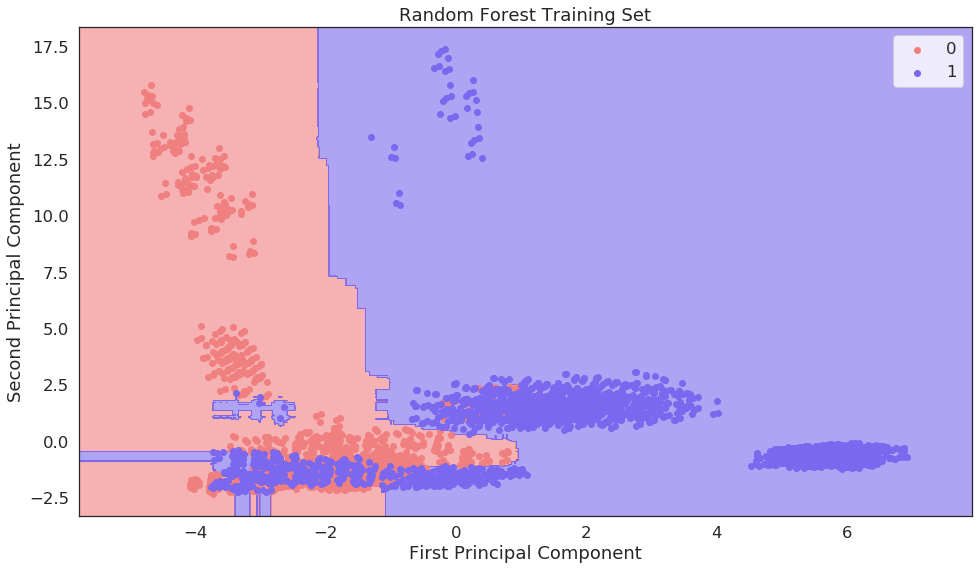

In [82]:
#Random Forest Training Set
sns.set_context(context='notebook',font_scale=1.5)
plt.figure(figsize=(16,9))
from matplotlib.colors import ListedColormap
X_set, y_set = X_train_pca, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, rf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.6, cmap = ListedColormap(('lightcoral', 'mediumslateblue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('lightcoral', 'mediumslateblue'))(i), label = j)
plt.title("Random Forest Training Set")
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.savefig("rf_pci_tr.jpeg", format='jpeg', dpi=300, bbox_inches='tight')
plt.legend()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


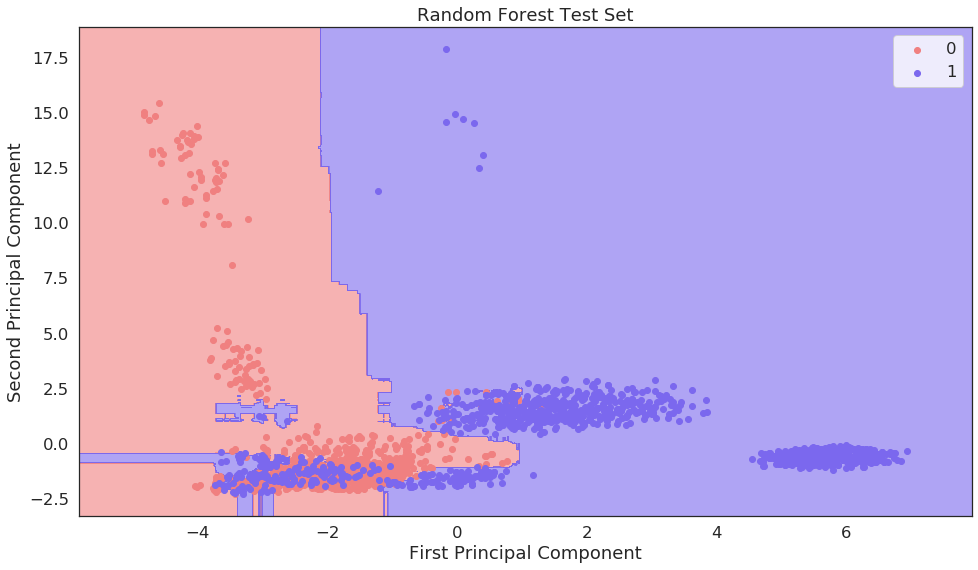

In [83]:
#Random forest Testing Set
sns.set_context(context='notebook',font_scale=1.5)
plt.figure(figsize=(16,9))
from matplotlib.colors import ListedColormap
X_set, y_set = X_test_pca, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, rf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.6, cmap = ListedColormap(('lightcoral', 'mediumslateblue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('lightcoral', 'mediumslateblue'))(i), label = j)
plt.title("Random Forest Test Set")
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.savefig("rf_pci_ts.jpeg", format='jpeg', dpi=300, bbox_inches='tight')
plt.legend()

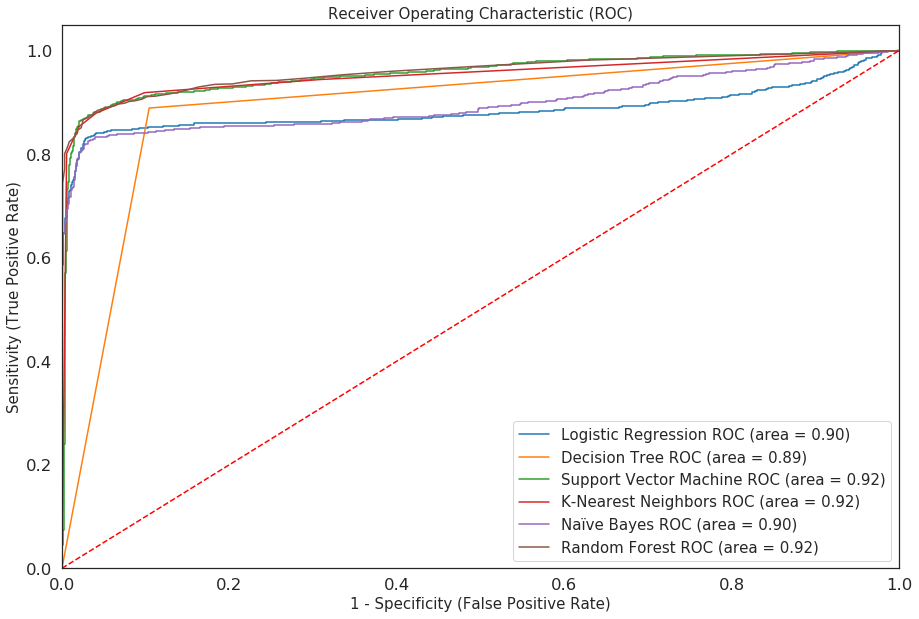

In [84]:
plt.figure(figsize=(15,10))
models = [
{
    'label': 'Logistic Regression',
    'model': lr,
},
{
    'label': 'Decision Tree',
    'model': dt,
},
{
    'label': 'Support Vector Machine',
    'model': svm,
},
{
    'label': 'K-Nearest Neighbors',
    'model': knn,
},
{
    'label': 'Naïve Bayes',
    'model': nb,
},
{
    'label': 'Random Forest',
    'model': rf,
}
]

for m in models:
    model = m['model'] 
    model.fit(X_train_pca, y_train) 
    y_pred=model.predict(X_test_pca) 
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test_pca)[:,1])
    auc = roc_auc_score(y_test,model.predict(X_test_pca))
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity (False Positive Rate)', fontsize=15)
plt.ylabel('Sensitivity (True Positive Rate)', fontsize=15)
plt.title('Receiver Operating Characteristic (ROC)', fontsize=15)
plt.legend(loc="lower right", fontsize=15)
plt.savefig("roc.jpeg", format='jpeg', dpi=300, bbox_inches='tight')
plt.show()